In [3]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import optuna
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

/home/jeisiany-wsl/TCC/tcc/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Tratamento dos Dados

In [ ]:
df = pd.read_csv('dataset_fz_cz.csv')

df

,Amostras_1,Amostras_2,Amostras_3,Amostras_4,Amostras_5,Amostras_6,Amostras_7,Amostras_8,Amostras_9,Amostras_10,...,H3_Amostras_499,H3_Amostras_500,classe,Freq_analisada_Hz,Freq_h2_analisada_Hz,Freq_h3_analisada_Hz,Faixa_Moduladora,Intensidade_db,Canal,voluntario
0,-11.9287104248694-14.875441163193j,-2.63714438278631-14.1628903301632j,9.73905140697886-4.24308876347259j,-3.43817508699753-2.8378860807684j,0.938320862758085+5.95107087382504j,8.34466503900969+1.6684502012175j,8.77886551905124+8.3157768855802j,10.9624002530382+2.01821508312438j,4.19255303664547+5.1380440057899j,8.489090178271+12.2496259592486j,...,2.96261529939806+4.79710086212997j,-7.31741358674807+4.70537845918188j,1,33,66,99,40,70,Fz,AH
1,5.66665098295756-5.73863696753984j,9.34414941536059-5.20427593084129j,3.3898302601677-11.5270457678019j,3.14738280266078-2.34459462857865j,-7.21764374881923-6.31323753300691j,9.47886518313603+0.200072129045863j,5.08831951684019-5.29782869354779j,16.7717167465448+5.85075431837294j,5.21140736817612-2.50991292686624j,-8.31799871316987-1.95038263571372j,...,-6.20208475102569+2.46727892927902j,7.16105057407892-5.27781760021583j,1,37,74,111,40,70,Fz,AH
2,5.03028213137088+3.47361196230173j,-8.13721439651841-1.54700800702243j,-3.49032348809159-6.66477217226851j,-6.31856869684226+1.36460382685254j,-5.21954769011709+1.91627182728754j,10.3586555260325+19.1357487143088j,-3.45204256695516+0.342587220032595j,6.42602420941557+10.2961333905352j,0.497455231380335+3.93198354291971j,8.29572494083051-6.29351136704858j,...,1.87849811188896-3.34825859449435j,1.00752836863572-4.40525244757286j,1,41,82,123,40,70,Fz,AH
3,-2.69437552533651-0.443265571662665j,2.26297505445924-4.32979978993325j,0.878647306471491-1.96030684712897j,11.0077443304137-2.79243994148609j,-14.5506837064631-9.21217511179037j,-1.65928041963358+4.1664351549347j,3.03285429976141-4.5718040583682j,-5.50383427622592+1.18211072326647j,-2.64321560104519+2.31977905364747j,5.15143673656233+7.14796532809706j,...,-4.84953649277811+9.19287403509272j,1.24583961895532-0.785187914779904j,1,45,90,135,40,70,Fz,AH
4,-14.1060396536154-11.9635989992521j,-3.09273257435156-10.5939169051076j,15.1230979200572+9.05970772430038j,-2.7337558296306+11.6971923757082j,-8.03980363779999+4.43023371717983j,-0.446586928611119+2.3003852581034j,5.90963584175537+11.5878523587431j,-5.90589543505183-1.89264297146193j,-5.75710935013775-5.63953389646059j,15.9100049379377+6.03935321543916j,...,-6.58425431634076+6.21617242295601j,3.21541169380933-0.890780116261766j,1,35,70,105,40,70,Fz,AH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7035,1.23342393885445+5.47012447903235j,-3.2137273154451-1.25227988006925j,-2.28249462103729+2.90207968457939j,-1.15668249225038+3.08003752783232j,3.15644398020279+4.49803853829384j,-7.74585613426978-7.61133250059893j,-7.49031977702516-3.23681015279529j,-3.03942767621362-2.45014749652219j,5.83063863846665-3.24102187177299j,-3.52370622874744-1.51597718043333j,...,0.359439713921665-1.04158672839389j,-0.293119683981067-0.266427840556336j,0,71,142,213,80,50,Cz,YR
7036,5.39032305066849-13.8318915373136j,3.42301008398015+7.10140103462314j,1.09428818290243+2.91589273924466j,-1.09174796156842-8.39065672985136j,4.57180730403233-2.97242017408624j,-4.18239005406788-4.10225521614628j,2.92932970785081-2.67051079795271j,8.69396262301191-2.90838066247666j,-0.0425778006820427+6.69650005646504j,2.44686306824126+6.84488036891277j,...,-0.521140230291086-0.962256984455294j,1.24255114023968+0.826420513503767j,0,72,144,216,80,50,Cz,YR
7037,10.3419977477122-6.28246408125246j,6.27172963668154+0.0321494660675186j,0.6983108549129-0.884564151614837j,0.74880484586807-0.573513320773653j,-3.60403416773436-2.29131690144217j,5.52247724835171+2.21490679388279j,1.85723684028169+4.67017173418392j,-2.61636689661183-4.47762957123526j,3.37177629278604-2.51744171108589j,-4.20906833022564+0.62494634651902j,...,0.286769363925037+1.07199692927688j,0.227195067171854-0.90101025724243j,0,73,146,219

In [4]:
y = df['classe']
X = df.drop(['classe',
             'Freq_analisada_Hz',
             'Freq_h2_analisada_Hz',
             'Freq_h3_analisada_Hz',
             'Faixa_Moduladora',
             'Intensidade_db',
             'Canal',
             'voluntario'], axis=1)

X.columns = range(X.shape[1])

complex_columns = X.columns
X[complex_columns] = X[complex_columns].map(lambda x: complex(x))

In [71]:
X

,0,1,2,3,4,5,6,7,8,9,...,1490,1491,1492,1493,1494,1495,1496,1497,1498,1499
0,-11.928710-14.875441j,-2.637144-14.162890j,9.739051- 4.243089j,-3.438175- 2.837886j,0.938321+ 5.951071j,8.344665+ 1.668450j,8.778866+ 8.315777j,10.962400+ 2.018215j,4.192553+5.138044j,8.489090+12.249626j,...,9.103566+ 9.435897j,-2.336631+8.832988j,-10.832451+ 3.993835j,3.137490- 8.468658j,-1.075295- 2.527197j,-0.810220- 0.247064j,-0.751739- 8.966414j,-0.260227-1.658156j,2.962615+4.797101j,-7.317414+4.705378j
1,5.666651- 5.738637j,9.344149- 5.204276j,3.389830-11.527046j,3.147383- 2.344595j,-7.217644- 6.313238j,9.478865+ 0.200072j,5.088320- 5.297829j,16.771717+ 5.850754j,5.211407-2.509913j,-8.317999- 1.950383j,...,-7.927804+23.548019j,-1.802322+1.824562j,-5.770971- 4.981372j,-0.882026+ 3.253547j,-5.363731+17.628109j,6.751917+12.662941j,12.496561- 3.695809j,0.331880-2.503308j,-6.202085+2.467279j,7.161051-5.277818j
2,5.030282+ 3.473612j,-8.137214- 1.547008j,-3.490323- 6.664772j,-6.318569+ 1.364604j,-5.219548+ 1.916272j,10.358656+19.135749j,-3.452043+ 0.342587j,6.426024+10.296133j,0.497455+3.931984j,8.295725- 6.293511j,...,-2.828696- 0.128646j,-4.818398-1.112234j,-6.198374- 3.297027j,-3.874503- 1.408132j,-5.343530+ 4.601522j,4.447575- 3.343470j,-2.337388+ 0.455804j,-1.842735+4.406146j,1.878498-3.348259j,1.007528-4.405252j
3,-2.694376- 0.443266j,2.262975- 4.329800j,0.878647- 1.960307j,11.007744- 2.792440j,-14.550684- 9.212175j,-1.659280+ 4.166435j,3.032854- 4.571804j,-5.503834+ 1.182111j,-2.643216+2.319779j,5.151437+ 7.147965j,...,6.727956- 0.202927j,-1.277419-6.208759j,-4.230843- 8.575140j,-2.162852+ 6.092543j,5.071535+ 2.249921j,-0.274669+ 0.484113j,4.154815- 5.514289j,1.909024-1.733071j,-4.849536+9.192874j,1.245840-0.785188j
4,-14.106040-11.963599j,-3.092733-10.593917j,15.123098+ 9.059708j,-2.733756+11.697192j,-8.039804+ 4.430234j,-0.446587+ 2.300385j,5.909636+11.587852j,-5.905895- 1.892643j,-5.757109-5.639534j,15.910005+ 6.039353j,...,-15.713207- 7.360471j,3.954299-4.250394j,9.414769+ 6.879545j,-1.026652+11.922406j,-12.809472- 5.596903j,-0.780966+ 6.459646j,3.466773+12.504563j,-6.099464-3.780927j,-6.584254+6.216172j,3.215412-0.890780j
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7035,1.233424+ 5.470124j,-3.213727- 1.252280j,-2.282495+ 2.902080j,-1.156682+ 3.080038j,3.156444+ 4.498039j,-7.745856- 7.611333j,-7.490320- 3.236810j,-3.039428- 2.450147j,5.830639-3.241022j,-3.523706- 1.515977j,...,-0.160555+ 0.632960j,0.292617-0.355330j,-0.976156- 0.125254j,-0.043602- 0.686357j,0.250999+ 0.181084j,-0.076604- 0.305950j,-0.126921+ 1.101992j,-0.540381+0.456770j,0.359440-1.041587j,-0.293120-0.266428j
7036,5.390323-13.831892j,3.423010+ 7.101401j,1.094288+ 2.915893j,-1.091748- 8.390657j,4.571807- 2.972420j,-4.182390- 4.102255j,2.929330- 2.670511j,8.693963- 2.908381j,-0.042578+6.696500j,2.446863+ 6.844880j,...,-0.321767- 0.180326j,-0.512844-0.296002j,0.245161- 1.340586j,0.037609+ 0.483412j,0.306392- 0.361839j,1.010377+ 0.222846j,0.157363- 1.431116j,-0.958126-0.691238j,-0.521140-0.962257j,1.242551+0.826421j
7037,10.341998- 6.282464j,6.271730+ 0.032149j,0.698311- 0.884564j,0.748805- 0.573513j,-3.604034- 2.291317j,5.522477+ 2.214907j,1.857237+ 4.670172j,-2.616367- 4.477630j,3.371776-2.517442j,-4.209068+ 0.624946j,...,-0.759009- 0.360808j,-0.147185+0.937618j,0.175080+ 0.084079j,0.178838- 1.238626j,1.146739+ 1.093663j,0.203428+ 0.461072j,-0.022692- 0.592349j,-1.734566+0.369387j,0.286769+1.071997j,0.227195-0.901010j
7038,10.399515- 0.374395j,-7.563381+ 1.560494j,6.184476- 1.687219j,-2.518504+ 3.693336j,7.458070+ 6.606351j,-2.561022+ 1.995828j,3.641817+ 2.060429j,8.677459+ 5.400357j,-4.049961-2.583234j,0.414107- 7.186061j,...,-0.091267+ 0.025630j,-0.599428+0.547142j,0.557771- 0.141577j,-0.127373- 1.348519j,-1.066507+ 0.252798j,0.157825- 0.182019j,0.364545- 0.623484j,0.199376-0.755845j,1.144198-0.733281j,-0.946943+0.200754j


In [5]:
X_f0 = X.iloc[:, :500]
X_f0

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,-11.928710-14.875441j,-2.637144-14.162890j,9.739051- 4.243089j,-3.438175- 2.837886j,0.938321+ 5.951071j,8.344665+ 1.668450j,8.778866+ 8.315777j,10.962400+ 2.018215j,4.192553+5.138044j,8.489090+12.249626j,...,10.762492- 6.025673j,-1.632676+ 1.225097j,-7.596579-16.103768j,-0.216726+ 0.316262j,25.630336-14.919646j,-2.060430+ 5.308544j,-28.945346-21.630496j,-9.197063- 4.776826j,9.014239-10.198683j,10.833321+ 4.130351j
1,5.666651- 5.738637j,9.344149- 5.204276j,3.389830-11.527046j,3.147383- 2.344595j,-7.217644- 6.313238j,9.478865+ 0.200072j,5.088320- 5.297829j,16.771717+ 5.850754j,5.211407-2.509913j,-8.317999- 1.950383j,...,8.077006- 2.450638j,5.536716- 2.674598j,3.220150+ 7.451692j,-2.781569+ 0.794667j,-14.826070+ 2.844775j,-0.353782-11.203817j,-7.774658+ 6.670077j,-16.306622- 1.334211j,15.716830+ 1.668351j,-8.222067+ 9.883657j
2,5.030282+ 3.473612j,-8.137214- 1.547008j,-3.490323- 6.664772j,-6.318569+ 1.364604j,-5.219548+ 1.916272j,10.358656+19.135749j,-3.452043+ 0.342587j,6.426024+10.296133j,0.497455+3.931984j,8.295725- 6.293511j,...,-10.415713+ 2.694269j,-6.855254+ 6.386199j,-7.431757- 0.079620j,0.070872- 0.886761j,3.447768-17.123976j,-1.250024- 7.113759j,-0.702039- 6.470909j,-1.909156+ 0.038461j,1.876545- 3.854443j,-2.539314- 8.185058j
3,-2.694376- 0.443266j,2.262975- 4.329800j,0.878647- 1.960307j,11.007744- 2.792440j,-14.550684- 9.212175j,-1.659280+ 4.166435j,3.032854- 4.571804j,-5.503834+ 1.182111j,-2.643216+2.319779j,5.151437+ 7.147965j,...,-3.950999- 9.946862j,9.725179-13.849486j,5.468995+ 7.816748j,19.021305- 3.194024j,-0.096165- 3.278488j,4.711426- 5.753388j,3.986377+ 9.477657j,0.997034- 9.354234j,-3.365885- 9.640014j,1.160621+13.109880j
4,-14.106040-11.963599j,-3.092733-10.593917j,15.123098+ 9.059708j,-2.733756+11.697192j,-8.039804+ 4.430234j,-0.446587+ 2.300385j,5.909636+11.587852j,-5.905895- 1.892643j,-5.757109-5.639534j,15.910005+ 6.039353j,...,2.340203+ 8.537311j,-2.441823+16.152369j,-7.452733+13.236527j,-1.475344-10.116503j,-16.804818- 2.406014j,5.356770- 4.615183j,-2.731940+ 0.311078j,-2.752891+ 7.352705j,17.212099- 1.015191j,-12.917027+11.299421j
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7035,1.233424+ 5.470124j,-3.213727- 1.252280j,-2.282495+ 2.902080j,-1.156682+ 3.080038j,3.156444+ 4.498039j,-7.745856- 7.611333j,-7.490320- 3.236810j,-3.039428- 2.450147j,5.830639-3.241022j,-3.523706- 1.515977j,...,-0.425207+ 2.239204j,3.649827+ 1.054174j,1.302216- 0.747646j,4.327603+ 2.640769j,4.773824- 1.206879j,0.648205- 1.659244j,-6.218782- 2.938512j,4.465185+ 3.507228j,3.359464- 0.896916j,-2.177292- 1.791168j
7036,5.390323-13.831892j,3.423010+ 7.101401j,1.094288+ 2.915893j,-1.091748- 8.390657j,4.571807- 2.972420j,-4.182390- 4.102255j,2.929330- 2.670511j,8.693963- 2.908381j,-0.042578+6.696500j,2.446863+ 6.844880j,...,-0.515103- 3.004086j,-3.951275+ 4.453304j,2.541777+ 0.695438j,2.559262- 4.794647j,1.174662- 1.006595j,0.087738+ 0.340670j,0.500339- 0.530716j,3.349928+ 3.489306j,1.235842- 2.136655j,-0.899796- 2.225893j
7037,10.341998- 6.282464j,6.271730+ 0.032149j,0.698311- 0.884564j,0.748805- 0.573513j,-3.604034- 2.291317j,5.522477+ 2.214907j,1.857237+ 4.670172j,-2.616367- 4.477630j,3.371776-2.517442j,-4.209068+ 0.624946j,...,-0.879071+ 3.262388j,1.617648+ 0.525990j,-0.646054+ 0.437304j,-2.663545- 4.214122j,1.471718- 2.848828j,0.268334+ 1.444484j,-0.772086+ 1.368350j,0.002148- 2.747856j,-2.559264- 1.299448j,-2.582539- 2.784639j
7038,10.399515- 0.374395j,-7.563381+ 1.560494j,6.184476- 1.687219j,-2.518504+ 3.693336j,7.458070+ 6.606351j,-2.561022+ 1.995828j,3.641817+ 2.060429j,8.677459+ 5.400357j,-4.049961-2.583234j,0.414107- 7.186061j,...,1.540176- 1.493677j,6.883941+ 2.379885j,-3.166200- 2.649257j,2.215796+ 1.151559j,0.706488+ 1.146481j,-0.555011- 3.638404j,0.896458- 2.117494j,-1.849703- 1.865515j,-2.446036+ 1.261095j,2.722319+ 0.476470j


In [6]:
X_h2 = X.iloc[:, :1000]
X_h2

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,-11.928710-14.875441j,-2.637144-14.162890j,9.739051- 4.243089j,-3.438175- 2.837886j,0.938321+ 5.951071j,8.344665+ 1.668450j,8.778866+ 8.315777j,10.962400+ 2.018215j,4.192553+5.138044j,8.489090+12.249626j,...,2.684201+ 6.903897j,9.039897+ 0.063738j,9.733968+ 5.785735j,-2.978852+ 2.972093j,3.975621+0.138855j,-5.443892+0.023034j,-1.312115-4.718385j,17.360822+ 4.251400j,3.452612+ 5.579176j,-2.142294- 7.531975j
1,5.666651- 5.738637j,9.344149- 5.204276j,3.389830-11.527046j,3.147383- 2.344595j,-7.217644- 6.313238j,9.478865+ 0.200072j,5.088320- 5.297829j,16.771717+ 5.850754j,5.211407-2.509913j,-8.317999- 1.950383j,...,6.306721+ 0.523812j,-7.186571+ 2.664793j,1.815685- 5.864991j,6.857271- 9.200398j,5.287621-6.835752j,-0.373793+7.232093j,1.505372+0.771476j,1.988609+11.482696j,8.432451+13.696856j,4.046401- 6.432832j
2,5.030282+ 3.473612j,-8.137214- 1.547008j,-3.490323- 6.664772j,-6.318569+ 1.364604j,-5.219548+ 1.916272j,10.358656+19.135749j,-3.452043+ 0.342587j,6.426024+10.296133j,0.497455+3.931984j,8.295725- 6.293511j,...,11.724511+ 9.167683j,-6.158582+ 5.330302j,9.034814- 1.005744j,7.733599+ 4.937707j,-3.643471+7.158544j,4.795277+5.546327j,-2.474693-0.931219j,-7.497878+ 6.062493j,-8.370857- 2.829563j,-1.867280+ 0.930871j
3,-2.694376- 0.443266j,2.262975- 4.329800j,0.878647- 1.960307j,11.007744- 2.792440j,-14.550684- 9.212175j,-1.659280+ 4.166435j,3.032854- 4.571804j,-5.503834+ 1.182111j,-2.643216+2.319779j,5.151437+ 7.147965j,...,-2.332002- 6.513605j,-3.571802- 2.281648j,11.942915+ 1.124562j,10.556913-16.158195j,6.033167+9.342920j,3.253191+1.164733j,-8.785676+2.362344j,12.527836+ 6.016918j,-7.978429+ 4.685994j,-7.263159- 3.395248j
4,-14.106040-11.963599j,-3.092733-10.593917j,15.123098+ 9.059708j,-2.733756+11.697192j,-8.039804+ 4.430234j,-0.446587+ 2.300385j,5.909636+11.587852j,-5.905895- 1.892643j,-5.757109-5.639534j,15.910005+ 6.039353j,...,1.598795+ 1.902422j,14.206067+10.049330j,11.222423+ 3.786241j,-6.785293+ 8.770586j,4.148249-0.946978j,0.623592+8.462934j,-8.736576+5.656894j,1.494047+11.297951j,8.490694- 3.850217j,12.994992- 2.825744j
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7035,1.233424+ 5.470124j,-3.213727- 1.252280j,-2.282495+ 2.902080j,-1.156682+ 3.080038j,3.156444+ 4.498039j,-7.745856- 7.611333j,-7.490320- 3.236810j,-3.039428- 2.450147j,5.830639-3.241022j,-3.523706- 1.515977j,...,0.492569- 0.587517j,-0.083060+ 0.327502j,0.332949- 1.550909j,-1.168154- 1.314766j,0.577334-0.451045j,0.968947-0.603857j,-1.556248-1.383583j,-0.617227+ 0.001153j,-0.691842- 0.244419j,0.457359- 0.554642j
7036,5.390323-13.831892j,3.423010+ 7.101401j,1.094288+ 2.915893j,-1.091748- 8.390657j,4.571807- 2.972420j,-4.182390- 4.102255j,2.929330- 2.670511j,8.693963- 2.908381j,-0.042578+6.696500j,2.446863+ 6.844880j,...,0.686263+ 0.231970j,-1.588080- 0.271254j,-0.332746+ 1.073510j,-0.833430- 0.633408j,-1.250047+0.642665j,2.015107-0.088069j,-0.068493-0.791682j,0.145698- 1.684688j,-1.462926+ 2.234124j,0.833782- 1.040415j
7037,10.341998- 6.282464j,6.271730+ 0.032149j,0.698311- 0.884564j,0.748805- 0.573513j,-3.604034- 2.291317j,5.522477+ 2.214907j,1.857237+ 4.670172j,-2.616367- 4.477630j,3.371776-2.517442j,-4.209068+ 0.624946j,...,1.371359- 1.455031j,-0.393442- 0.006597j,-0.747100- 0.137338j,2.195088+ 0.695298j,1.184694+0.227362j,-1.748034-0.944723j,0.021538-1.313718j,2.476503+ 2.453153j,0.485627- 0.667553j,0.053104+ 2.126273j
7038,10.399515- 0.374395j,-7.563381+ 1.560494j,6.184476- 1.687219j,-2.518504+ 3.693336j,7.458070+ 6.606351j,-2.561022+ 1.995828j,3.641817+ 2.060429j,8.677459+ 5.400357j,-4.049961-2.583234j,0.414107- 7.186061j,...,2.038358- 0.314374j,-1.841056+ 1.853158j,0.314194- 0.601380j,0.379785+ 1.795322j,-0.683786+0.048117j,-0.756671-0.492573j,-1.497701+2.661242j,0.988211- 1.312252j,-1.792108- 0.663783j,-0.218447- 1.551574j


In [17]:
y.value_counts()

classe
0    5632
1    1408
Name: count, dtype: int64

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [7]:
X_train_f0, X_test_f0, y_train_f0, y_test_f0 = train_test_split(X_f0, y, test_size=0.2, random_state=42, stratify=y)

In [8]:
X_train_h2, X_test_h2, y_train_h2, y_test_h2 = train_test_split(X_h2, y, test_size=0.2, random_state=42, stratify=y)

In [14]:
X_train_rec = X_train.copy()
X_test_rec = X_test.copy()

In [9]:
X_train_rec_f0 = X_train_f0.copy()
X_test_rec_f0 = X_test_f0.copy()

In [15]:
X_train = np.abs(X_train)
X_test = np.abs(X_test)

In [10]:
X_train_f0 = np.abs(X_train_f0)
X_test_f0 = np.abs(X_test_f0)

In [11]:
X_train_h2 = np.abs(X_train_h2)
X_test_h2 = np.abs(X_test_h2)

In [ ]:
X_train_rec.to_csv('X_train_rec.csv', index=False)
X_test_rec.to_csv('X_test_rec.csv', index=False)
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)

y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

In [12]:
X_train_rec_f0.to_csv('X_train_rec_f0.csv', index=False)
X_test_rec_f0.to_csv('X_test_rec_f0.csv', index=False)

X_train_f0.to_csv('X_train_f0.csv', index=False)
X_test_f0.to_csv('X_test_f0.csv', index=False)

y_train_f0.to_csv('y_train_f0.csv', index=False)
y_test_f0.to_csv('y_test_f0.csv', index=False)

In [13]:
X_train_h2.to_csv('f0 e h2/X_train_h2.csv', index=False)
X_test_h2.to_csv('f0 e h2/X_test_h2.csv', index=False)

y_train_h2.to_csv('f0 e h2/y_train_h2.csv', index=False)
y_test_h2.to_csv('f0 e h2/y_test_h2.csv', index=False)

Até aqui, foi realizado a separação do X e Y, nos quais foram separados em conjunto de teste e treinamento. Além disso, os conjuntos de treino para os modelos de ML foram transformados para pegar apenas os módulos, já os em formato retangular, será utilizado na CSM e MSC. Obtendo assim, 4 datasets finais

# Desenvolvimento dos Modelos

## Carregando os Dados

In [4]:
X_train_f0 = pd.read_csv('f0/X_train_f0.csv')
X_test_f0 = pd.read_csv('f0/X_test_f0.csv')
y_train_f0 = pd.read_csv('f0/y_train_f0.csv')
y_test_f0 = pd.read_csv('f0/y_test_f0.csv')

In [5]:
X_train_h2 = pd.read_csv('f0_h2/X_train_h2.csv')
X_test_h2 = pd.read_csv('f0_h2/X_test_h2.csv')
y_train_h2 = pd.read_csv('f0_h2/y_train_h2.csv')
y_test_h2 = pd.read_csv('f0_h2/y_test_h2.csv')

In [6]:
X_train = pd.read_csv('f0_h2_h3/X_train.csv')
X_test = pd.read_csv('f0_h2_h3/X_test.csv')
y_train = pd.read_csv('f0_h2_h3/y_train.csv')
y_test = pd.read_csv('f0_h2_h3/y_test.csv')

## Normalizando os Dados

In [7]:
scaler = StandardScaler()
X_train_f0 = scaler.fit_transform(X_train_f0)
X_test_f0 = scaler.transform(X_test_f0)

In [8]:
scaler = StandardScaler()
X_train_h2 = scaler.fit_transform(X_train_h2)
X_test_h2 = scaler.transform(X_test_h2)

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
datasets = {
    'Fundamental': {
        'X_train': X_train_f0,
        'y_train': y_train_f0,
        'X_test': X_test_f0,
        'y_test': y_test_f0
    },
    'Fundamental + 2º Harmônico': {
        'X_train': X_train_h2,
        'y_train': y_train_h2,
        'X_test': X_test_h2,
        'y_test': y_test_h2
    },
    'Fundamental + 2º + 3º Harmônicos': {
        'X_train': X_train,
        'y_train': y_train,
        'X_test': X_test,
        'y_test': y_test
    }
}

In [10]:
X_train.shape

(5632, 1500)

## Optuna

### Criando o modelo RNA

#### RNA Padrão

In [8]:
def create_model(trial, input_shape):
    n_layers = trial.suggest_int('n_layers', 1, 20)
    units = trial.suggest_int('units', 32, 512, step=32)
    dropout = trial.suggest_float('dropout', 0.0, 0.5)
    learning_rate = trial.suggest_float('learning_rate', 1e-6, 1e-1, log=True)
    
    model = models.Sequential()
    model.add(layers.InputLayer(input_shape=input_shape))
    for i in range(n_layers):
        model.add(layers.Dense(units, activation='relu'))
        model.add(layers.Dropout(dropout))
    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

#### RNA variando parametros por camada

In [9]:
def create_model_layer(trial, input_shape):
    n_layers = trial.suggest_int('n_layers', 1, 3)
    units = []
    dropouts = []

    for i in range(n_layers):
        units.append(trial.suggest_int(f'units_{i}', 32, 512, step=32))
        dropouts.append(trial.suggest_float(f'dropout_{i}', 0.0, 0.5))

    learning_rate = trial.suggest_float('learning_rate', 1e-5, 1e-3, log=True)
    l2_weight = trial.suggest_float('l2_weight', 1e-5, 1e-2, log=True)
    
    model = models.Sequential()
    model.add(layers.InputLayer(input_shape=input_shape))
    
    for i in range(n_layers):
        model.add(layers.Dense(units[i], activation='relu', kernel_regularizer=l2(l2_weight)))
        model.add(layers.BatchNormalization())
        model.add(layers.Dropout(dropouts[i]))
    
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
        loss='binary_crossentropy',
        metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
    )
    return model

### Função Objetiva para todas as frequências

In [10]:
def objective(trial, X_train, y_train):
    input_shape = X_train.shape[1:]

    model = create_model_layer(trial, input_shape)
    y_train = y_train.squeeze().astype(int)
    
    classes = np.unique(y_train)
    class_weights = compute_class_weight('balanced', classes=classes, y=y_train)
    class_weight = {i: w for i, w in zip(classes, class_weights)}

    callback = tf.keras.callbacks.EarlyStopping(
        monitor='val_auc',
        patience=30,
        verbose=1,
        mode='max',
        restore_best_weights=True
    )

    history = model.fit(
        X_train,
        y_train,
        epochs=200,
        batch_size=trial.suggest_categorical('batch_size', [16, 32, 64]),
        validation_split=0.1,
        callbacks=[callback],
        verbose=1,
        class_weight=class_weight
    )


    best_auc = max(history.history['val_auc'])

    return best_auc


### Treinando Modelo com os melhores hiperparametros 

In [11]:
def build_final_model(best_params, input_shape):
    model = models.Sequential()
    model.add(layers.InputLayer(input_shape=input_shape))
    
    # Extrai hiperparâmetros por camada
    n_layers = best_params['n_layers']
    units = [best_params[f'units_{i}'] for i in range(n_layers)]
    dropouts = [best_params[f'dropout_{i}'] for i in range(n_layers)]
    
    # Constrói as camadas
    for i in range(n_layers):
        model.add(layers.Dense(units[i], activation='relu', kernel_regularizer=l2(best_params['l2_weight'])))
        model.add(layers.BatchNormalization())
        model.add(layers.Dropout(dropouts[i]))
    
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=best_params['learning_rate']),
        loss='binary_crossentropy',
        metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
    )
    return model

#### Resultados

In [23]:
from sklearn.metrics import roc_curve, auc, classification_report

def evaluate_model(model, X_test, y_test, threshold=0.5):
    y_prob = model.predict(X_test).ravel()

    # AUC e FPR
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    # Encontre o threshold ótimo (maximiza TPR - FPR)
    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = thresholds[optimal_idx]
    
    y_test_1d = y_test.squeeze()
    y_pred = (y_prob > optimal_threshold).astype(int)
    
    # Métricas
    print(classification_report(y_test_1d, y_pred))
    print(pd.crosstab(y_test_1d, y_pred, rownames=['Real'], colnames=['Predito'], margins=True))
    print(f'AUC: {roc_auc:.4f}')
    print(f'Threshold ótimo: {optimal_threshold:.4f}')
    
    return roc_auc, optimal_threshold, fpr, tpr

In [24]:
results = {}

for dataset_name, data in datasets.items():
    print(f'\n=== Processando {dataset_name} ===')

    study_name = f'tcc_auc_{dataset_name.replace(" ", "_")}_v1'
    storage = 'sqlite:///tcc.db'
    model_path = f'models/{study_name}.keras'

    if os.path.exists(model_path):
        print(f"Modelo {model_path} já existe. Carregando modelo...")
        best_model = tf.keras.models.load_model(model_path)

        print(f'\n=== Avaliação em {dataset_name} ===')
        roc_auc, optimal_threshold, fpr, tpr = evaluate_model(best_model, data['X_test'], data['y_test'])
        results[dataset_name] = {
            'model': best_model,
            'auc': roc_auc,
            'threshold': optimal_threshold,
            'fpr': fpr,
            'tpr': tpr
        }
        continue

    try: 
        study = optuna.load_study(study_name=study_name, storage=storage)
        print(f"Estudo {study_name} já existe. Pulando Otimização...")
        
    except KeyError:
        print(f"Estudo {study_name} não existe. Criando novo estudo...")
        study = optuna.create_study(
            study_name=study_name,
            direction='maximize',
            load_if_exists=True,
            sampler=optuna.samplers.TPESampler(seed=42)
        )

    if len(study.trials) == 0:
        study.optimize(
            lambda trial: objective(trial, data['X_train'], data['y_train']),
            n_trials=50,
            gc_after_trial=True
        )
    
    # Passo 2: Treinar o modelo final com os melhores parâmetros
    best_model = build_final_model(study.best_params, data['X_train'].shape[1:])
    best_model.fit(
        data['X_train'],
        data['y_train'],
        epochs=100,
        batch_size=study.best_params['batch_size'],
        verbose=1
    )
    
    # Salvar o modelo
    print(f'\n=== Salvando o modelo em models ===')
    best_model.save(f'models/{study_name}.keras')
    # Passo 3: Avaliar no teste
    print(f'\n=== Avaliação em {dataset_name} ===')
    roc_auc, optimal_threshold, fpr, tpr = evaluate_model(best_model, data['X_test'], data['y_test'])
    results[dataset_name] = {
        'model': best_model,
        'auc': roc_auc,
        'threshold': optimal_threshold,
        'fpr': fpr,
        'tpr': tpr
    }


=== Processando Fundamental ===
Modelo models/tcc_auc_Fundamental_v1.keras já existe. Carregando modelo...

=== Avaliação em Fundamental ===
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
              precision    recall  f1-score   support

           0       0.91      0.77      0.84      1126
           1       0.44      0.71      0.54       282

    accuracy                           0.76      1408
   macro avg       0.68      0.74      0.69      1408
weighted avg       0.82      0.76      0.78      1408

Predito    0    1   All
Real                   
0        868  258  1126
1         82  200   282
All      950  458  1408
AUC: 0.8165
Threshold ótimo: 0.0196

=== Processando Fundamental + 2º Harmônico ===
Modelo models/tcc_auc_Fundamental_+_2º_Harmônico_v1.keras já existe. Carregando modelo...

=== Avaliação em Fundamental + 2º Harmônico ===
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

           0       0.93      0.89      0.91      1126
 

## RNA + LSTM

In [1]:
from tensorflow.keras import layers, models

def create_lstm_model(input_shape):
    model = models.Sequential()
    
    model.add(layers.LSTM(64, return_sequences=True, input_shape=input_shape))
    model.add(layers.Dropout(0.2))

    model.add(layers.LSTM(64, return_sequences=False))
    model.add(layers.Dropout(0.2))

    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
    )
    return model

## Treinando o modelo com os melhores parâmetros do Optuna -- OLD VERSION

In [40]:
storage_study = 'sqlite:///tcc.db'
study = optuna.load_study(
    study_name='tcc_v5',
    storage=storage_study
)
best_params = study.best_params
print('Melhores hiperparâmetros:', best_params)

Melhores hiperparâmetros: {'n_layers': 8, 'units': 352, 'dropout': 0.11793745620268263, 'learning_rate': 0.0005032569690210589, 'batch_size': 32}


### F0

In [ ]:
def test_model(X_train, y_train, X_test, y_test, dataset):
    study = optuna.load_study(
        study_name=f'tcc_{dataset}_v5',
        storage=storage_study
    )
    best_model = create_model(study.best_trial, X_train.shape[1:])
    best_model.fit(
        X_train,
        y_train,
        epochs=150,
        batch_size=best_params['batch_size'],
        verbose=1
    )

    y_test_pred = (best_model.predict(X_test)).ravel()
    test_auc = roc_auc_score(y_test, y_test_pred)

    
    print(f'AUC no teste: {test_auc:.4f}')

In [ ]:
from sklearn.metrics import classification_report
model = tf.keras.models.Sequential()
model.add(layers.InputLayer(input_shape=X_train_f0.shape[1:]))

for _ in range(best_params['n_layers']):
    model.add(layers.Dense(best_params['units'], activation='relu'))
    model.add(layers.Dropout(best_params['dropout']))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=best_params['learning_rate']),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

callback = tf.keras.callbacks.EarlyStopping(
    monitor='accuracy',
    patience=75,
    verbose=1,
)

hist = model.fit(
    X_train_f0,
    y_train_f0,
    epochs=150,
    batch_size=best_params['batch_size'],
    verbose=1,
    callbacks=[callback]
)


In [22]:
y_prob_f0 = model.predict(X_test_f0)
y_pred_labels_f0 = (y_prob_f0 > 0.5).astype(int)
acc = accuracy_score(y_test_f0, y_pred_labels_f0)
print('Acurácia no conjunto de teste:', acc)
print(classification_report(y_test_f0, y_pred_labels_f0))

2025-05-02 20:50:07.564679: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_16_0', 56 bytes spill stores, 56 bytes spill loads

2025-05-02 20:50:07.836278: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_16', 168 bytes spill stores, 168 bytes spill loads

2025-05-02 20:50:07.859719: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_16', 512 bytes spill stores, 512 bytes spill loads

2025-05-02 20:50:07.863785: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_16', 100 bytes spill stores, 100 bytes spill loads

2025-05-02 20:50:07.952496: I external/l

44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
Acurácia no conjunto de teste: 0.8551136363636364
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1126
           1       0.67      0.54      0.60       282

    accuracy                           0.86      1408
   macro avg       0.78      0.74      0.76      1408
weighted avg       0.85      0.86      0.85      1408



In [23]:
y_test_1d_f0 = y_test_f0.squeeze()
y_pred_labels_1d_f0 = y_pred_labels_f0.squeeze()
y_prob_1d_f0 = y_prob_f0.squeeze()

In [24]:
print(pd.crosstab(y_test_1d_f0, y_pred_labels_1d_f0, rownames=['Real'], colnames=['Predito'], margins=True),'')


Predito     0    1   All
Real                    
0        1052   74  1126
1         130  152   282
All      1182  226  1408 


In [25]:
limiar = 0.9897
y_pred_limiar_f0 = (y_prob_f0 > limiar)
y_pred_limiar_f0 = np.multiply(y_pred_limiar_f0, 1)
y_pred_limiar_f0 

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [26]:
y_pred_limiar_1d_f0 = y_pred_limiar_f0.squeeze()

In [27]:
from sklearn.metrics import confusion_matrix

tn_f0, fp_f0, fn_f0, tp_f0 = confusion_matrix(y_test_1d_f0, y_pred_limiar_1d_f0).ravel()

taxa_fp_f0 = fp_f0 / (fp_f0 + tn_f0)
taxa_detec_f0 = tp_f0 / (tp_f0 + fn_f0)

print('Taxa de Falsos Positivos:', taxa_fp_f0)
print('Taxa de Detecção:', taxa_detec_f0)

Taxa de Falsos Positivos: 0.003552397868561279
Taxa de Detecção: 0.15602836879432624


In [28]:
from sklearn.metrics import roc_curve, auc

fpr_f0, tpr_f0, thresholds_f0 = roc_curve(y_test_1d_f0, y_prob_f0)
roc_auc_f0 = auc(fpr_f0, tpr_f0)
print('AUC:', roc_auc_f0)

AUC: 0.8466752957182269


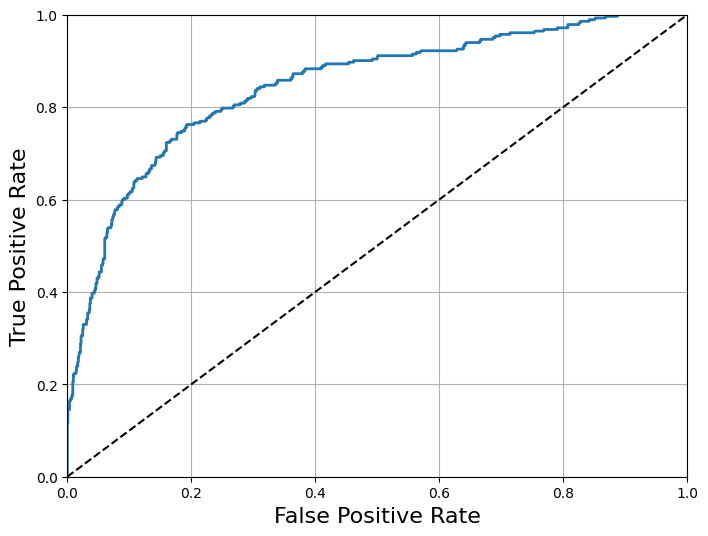

In [29]:
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_f0, tpr_f0)
plt.show()


### F0 e 2F0

In [31]:
from sklearn.metrics import classification_report
model = tf.keras.models.Sequential()
model.add(layers.InputLayer(input_shape=X_train_h2.shape[1:]))

for _ in range(best_params['n_layers']):
    model.add(layers.Dense(best_params['units'], activation='relu'))
    model.add(layers.Dropout(best_params['dropout']))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=best_params['learning_rate']),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

callback = tf.keras.callbacks.EarlyStopping(
    monitor='accuracy',
    patience=75,
    verbose=1,
)

hist = model.fit(
    X_train_h2,
    y_train_h2,
    epochs=150,
    batch_size=best_params['batch_size'],
    verbose=1,
    callbacks=[callback]
)




/home/jeisiany-wsl/TCC/tcc/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/150
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7674 - loss: 0.5319
Epoch 2/150
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8029 - loss: 0.4136
Epoch 3/150
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8221 - loss: 0.3508
Epoch 4/150
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8510 - loss: 0.2982
Epoch 5/150
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8532 - loss: 0.2972
Epoch 6/150
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8746 - loss: 0.2656
Epoch 7/150
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8935 - loss: 0.2162
Epoch 8/150
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8950 - loss: 0.2160
Epoch 9/150
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9010 - loss: 0.2216
Epoch 10/150
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9134 - loss: 0.1810
Epoch 11/150
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9079 - loss: 0.1869
Epoch 12/150
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy

In [32]:
y_prob_h2 = model.predict(X_test_h2)
y_pred_labels_h2 = (y_prob_h2 > 0.5).astype(int)
acc = accuracy_score(y_test_h2, y_pred_labels_h2)
print('Acurácia no conjunto de teste:', acc)
print(classification_report(y_test_h2, y_pred_labels_h2))

2025-05-02 20:52:12.170841: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_22_0', 40 bytes spill stores, 40 bytes spill loads

2025-05-02 20:52:12.450079: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_22', 584 bytes spill stores, 584 bytes spill loads



44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Acurácia no conjunto de teste: 0.8572443181818182
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1126
           1       0.63      0.69      0.66       282

    accuracy                           0.86      1408
   macro avg       0.78      0.79      0.78      1408
weighted avg       0.86      0.86      0.86      1408



In [33]:
y_test_1d_h2 = y_test_h2.squeeze()
y_pred_labels_1d_h2 = y_pred_labels_h2.squeeze()
y_prob_1d_h2 = y_prob_h2.squeeze()

In [34]:
print(pd.crosstab(y_test_1d_h2, y_pred_labels_1d_h2, rownames=['Real'], colnames=['Predito'], margins=True),'')


Predito     0    1   All
Real                    
0        1013  113  1126
1          88  194   282
All      1101  307  1408 


In [35]:
limiar = 0.9897
y_pred_limiar_h2 = (y_prob_h2 > limiar)
y_pred_limiar_h2 = np.multiply(y_pred_limiar_h2, 1)
y_pred_limiar_h2 

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [36]:
y_pred_limiar_1d_h2 = y_pred_limiar_h2.squeeze()

In [37]:
from sklearn.metrics import confusion_matrix

tn_h2, fp_h2, fn_h2, tp_h2 = confusion_matrix(y_test_1d_h2, y_pred_limiar_1d_h2).ravel()

taxa_fp_h2 = fp_h2 / (fp_h2 + tn_h2)
taxa_detec_h2 = tp_h2 / (tp_h2 + fn_h2)

print('Taxa de Falsos Positivos:', taxa_fp_h2)
print('Taxa de Detecção:', taxa_detec_h2)

Taxa de Falsos Positivos: 0.03641207815275311
Taxa de Detecção: 0.4929078014184397


In [38]:
from sklearn.metrics import roc_curve, auc

fpr_h2, tpr_h2, thresholds_h2 = roc_curve(y_test_1d_h2, y_prob_h2)
roc_auc_h2 = auc(fpr_h2, tpr_h2)
print('AUC:', roc_auc_h2)

AUC: 0.8982039605457088


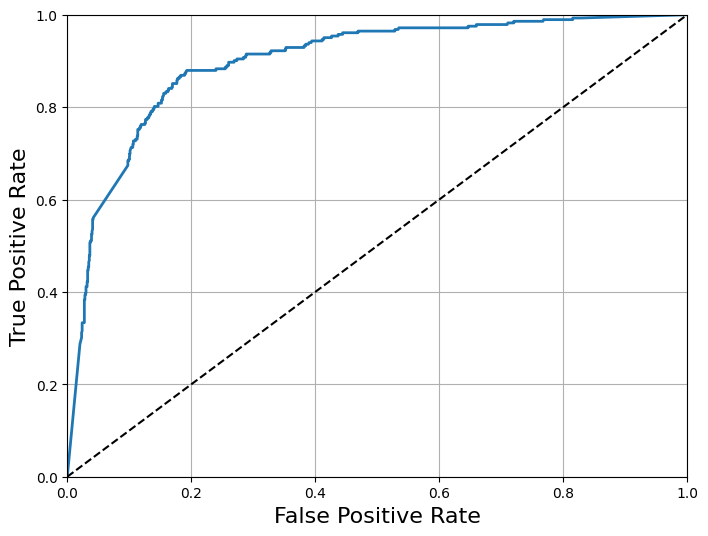

In [39]:
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_h2, tpr_h2)
plt.show()


### F0, 2F0 e 3F0

In [11]:
from sklearn.metrics import classification_report
model = tf.keras.models.Sequential()
model.add(layers.InputLayer(input_shape=X_train.shape[1:]))

for _ in range(best_params['n_layers']):
    model.add(layers.Dense(best_params['units'], activation='relu'))
    model.add(layers.Dropout(best_params['dropout']))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=best_params['learning_rate']),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

callback = tf.keras.callbacks.EarlyStopping(
    monitor='accuracy',
    patience=75,
    verbose=1,
)

hist = model.fit(
    X_train,
    y_train,
    epochs=150,
    batch_size=best_params['batch_size'],
    verbose=1,
    callbacks=[callback]
)


/home/jeisiany-wsl/TCC/tcc/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
I0000 00:00:1746227538.042398 1217631 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4968 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060, pci bus id: 0000:07:00.0, compute capability: 8.9


Epoch 1/150


I0000 00:00:1746227554.424008 1218903 service.cc:152] XLA service 0x7f69a4001fa0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1746227554.424048 1218903 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 4060, Compute Capability 8.9
2025-05-02 20:12:34.492620: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1746227554.931194 1218903 cuda_dnn.cc:529] Loaded cuDNN version 90300


  5/176 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.5279 - loss: 0.6658 

I0000 00:00:1746227558.206383 1218903 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


176/176 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7802 - loss: 0.4913
Epoch 2/150
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7979 - loss: 0.3841
Epoch 3/150
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8289 - loss: 0.3197
Epoch 4/150
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8683 - loss: 0.2629
Epoch 5/150
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8967 - loss: 0.2361
Epoch 6/150
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9127 - loss: 0.1785
Epoch 7/150
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9258 - loss: 0.1622
Epoch 8/150
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9302 - loss: 0.1553
Epoch 9/150
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9227 - loss: 0.1719
Epoch 10/150
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9265 - loss: 0.1298
Epoch 11/150
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9237 - loss: 0.1361
Epoch 12/150
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step

In [12]:
y_prob = model.predict(X_test)
y_pred_labels = (y_prob > 0.5).astype(int)
acc = accuracy_score(y_test, y_pred_labels)
print('Acurácia no conjunto de teste:', acc)
print(classification_report(y_test, y_pred_labels))

2025-05-02 20:16:57.909842: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_28_0', 56 bytes spill stores, 56 bytes spill loads

2025-05-02 20:16:57.955839: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_28', 168 bytes spill stores, 168 bytes spill loads

2025-05-02 20:16:58.197675: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_28', 100 bytes spill stores, 100 bytes spill loads

2025-05-02 20:16:58.244271: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_28', 608 bytes spill stores, 608 bytes spill loads

2025-05-02 20:16:58.405322: I external/l

44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Acurácia no conjunto de teste: 0.8877840909090909
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1126
           1       0.70      0.77      0.73       282

    accuracy                           0.89      1408
   macro avg       0.82      0.84      0.83      1408
weighted avg       0.89      0.89      0.89      1408



In [13]:
y_test_1d = y_test.squeeze()
y_pred_labels_1d = y_pred_labels.squeeze()
y_prob_1d = y_prob.squeeze()

In [14]:
print(pd.crosstab(y_test_1d, y_pred_labels_1d, rownames=['Real'], colnames=['Predito'], margins=True),'')


Predito     0    1   All
Real                    
0        1034   92  1126
1          66  216   282
All      1100  308  1408 


In [15]:
limiar = 0.9897
y_pred_limiar = (y_prob > limiar)
y_pred_limiar = np.multiply(y_pred_limiar, 1)
y_pred_limiar 

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [16]:
y_pred_limiar_1d = y_pred_limiar.squeeze()

In [17]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_test_1d, y_pred_limiar_1d).ravel()

taxa_fp = fp / (fp + tn)
taxa_detec = tp / (tp + fn)

print('Taxa de Falsos Positivos:', taxa_fp)
print('Taxa de Detecção:', taxa_detec)

Taxa de Falsos Positivos: 0.03285968028419183
Taxa de Detecção: 0.6170212765957447


In [18]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test_1d, y_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)

AUC: 0.8965537331670508


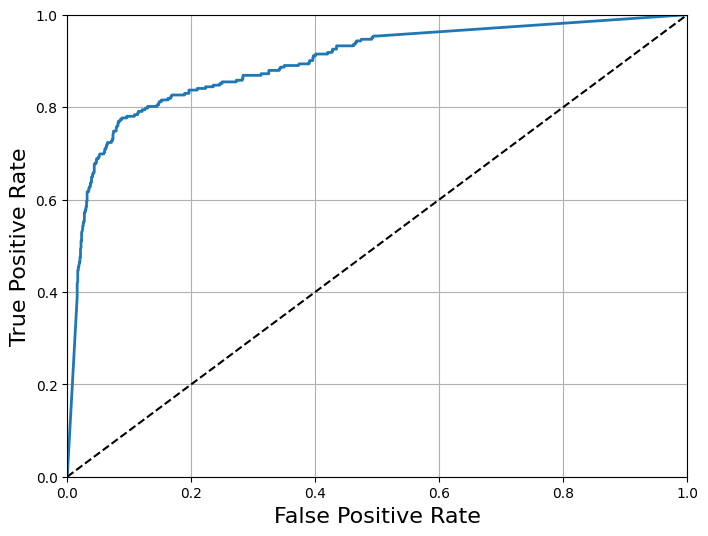

In [19]:
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()


# Métodos Tradicionais

In [15]:
X_test_rec = pd.read_csv('f0/X_test_rec_f0.csv')
y_test_f0 = pd.read_csv('f0/y_test_f0.csv')

X_test_rec_nh = X_test_rec.iloc[:, :500].values.astype(np.complex128)

In [16]:
X_test_rec_nh

array([[  6.92211005+12.43331891j,  -6.92778809 +2.10956721j,
         11.96879882 +1.84241055j, ...,   4.75080337-12.18768441j,
         -0.15881843-25.00658374j,   0.83728436 -2.62466574j],
       [-21.48642156+14.76599675j,  -4.07119261 -2.11272793j,
         12.39761478-16.89026798j, ...,  -0.62604476-17.02207963j,
        -15.24711546-17.84404428j,  -0.31504104+18.13952757j],
       [ -2.70740233+37.62646751j,  12.52547575+39.46828473j,
          2.18016183 +4.96436615j, ...,  -0.22329657 +1.46079576j,
          7.21606734 -3.45507184j,  -0.27426547 +2.65756739j],
       ...,
       [ -3.97101364 -7.99091218j,   2.72804886 -4.69748385j,
         -0.86777202 +7.46812259j, ...,  -4.71189591 +5.56216753j,
          5.33116619 +0.3700996j ,  -1.55718508 +6.79480459j],
       [ -1.66789849 -5.93200309j,  -0.37626572 +1.15080747j,
         -4.67506333 +2.70149619j, ...,   0.22812799 +3.02720624j,
         -2.89502873 +0.70331094j,   3.71749231 -0.29877342j],
       [  5.27676843 +5.5238

In [17]:
from sklearn.metrics import roc_curve

M = 500;
alfa=0.05;

teta = np.angle(X_test_rec_nh)
y_test_only_1=np.flatnonzero(y_test)
y_test_only_0=np.flatnonzero(y_test==0)
## CSM
CSM=(np.power((1/M)*np.sum(np.cos(teta),axis=1),2))+(np.power((1/M)*np.sum(np.sin(teta),axis=1),2))

from scipy.stats.distributions import chi2

VC_CSM=chi2.ppf(1-alfa, df=2)/(2*M)
VC_CSM
y_CSM_txd=(CSM[y_test_only_1] > VC_CSM)
#y_pred_limiar=int(y_pred_limiar)

# Converting boolean to integer
y_CSM_txd = np.multiply(y_CSM_txd, 1)

y_CSM_txd=np.mean(y_CSM_txd)


y_CSM_fp=(CSM[y_test_only_0] > VC_CSM)
#y_pred_limiar=int(y_pred_limiar)

# Converting boolean to integer
y_CSM_fp = np.multiply(y_CSM_fp, 1)

y_CSM_fp=np.mean(y_CSM_fp)

y_CSM=(CSM > VC_CSM)
#y_pred_limiar=int(y_pred_limiar)

# Converting boolean to integer
y_CSM = np.multiply(y_CSM, 1)

fpr_CSM, tpr_CSM, thresholds_CSM = roc_curve(y_test,CSM.transpose())
print(y_CSM_txd)
print(y_CSM_fp)
## MSC
MSC=(np.abs(np.sum(X_test_rec_nh,axis=1))**2)/(M*np.sum((np.abs(X_test_rec_nh)**2),axis=1))
MSC = np.reshape(MSC,(1,len(MSC)))

VC_MSC=1-(alfa**(1/(M-1)))
VC_MSC
y_MSC_txd=(MSC[0,y_test_only_1] > VC_MSC)
#y_pred_limiar=int(y_pred_limiar)

# Converting boolean to integer
y_MSC_txd = np.multiply(y_MSC_txd, 1)

y_MSC_txd=np.mean(y_MSC_txd)

from numpy import matlib

y_MSC_fp=(MSC[0, y_test_only_0] > np.matlib.repmat(VC_MSC,1096,1))
#y_pred_limiar=int(y_pred_limiar)

# Converting boolean to integer
y_MSC_fp = np.multiply(y_MSC_fp, 1)

y_MSC_fp=np.mean(y_MSC_fp)

fpr_MSC, tpr_MSC, thresholds_MSC = roc_curve(y_test,MSC.transpose())


0.851063829787234
0.11811722912966252


In [27]:
# Supondo que você já tenha as curvas externas:
results['CSM'] = {
    'fpr': fpr_CSM, 
    'tpr': tpr_CSM, 
    'auc': auc(fpr_CSM, tpr_CSM),
    'label': 'CSM'
}

results['MSC'] = {
    'fpr': fpr_MSC, 
    'tpr': tpr_MSC, 
    'auc': auc(fpr_MSC, tpr_MSC),
    'label': 'MSC'
}

# Curva ROC - Comparação

In [25]:
def plot_all_roc_curves(results):
    plt.figure(figsize=(10, 8))
    
    # Plotar cada curva do dicionário
    for key in results:
        data = results[key]
        plt.plot(
            data['fpr'], 
            data['tpr'], 
            linewidth=2,
            label=f"{data.get('label', key)} (AUC = {data['auc']:.2f})"
        )
    
    # Linha de referência
    plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title('Comparação de Curvas ROC', fontsize=14)
    plt.legend(loc='lower right', fontsize=10)
    plt.grid(True)
    plt.show()

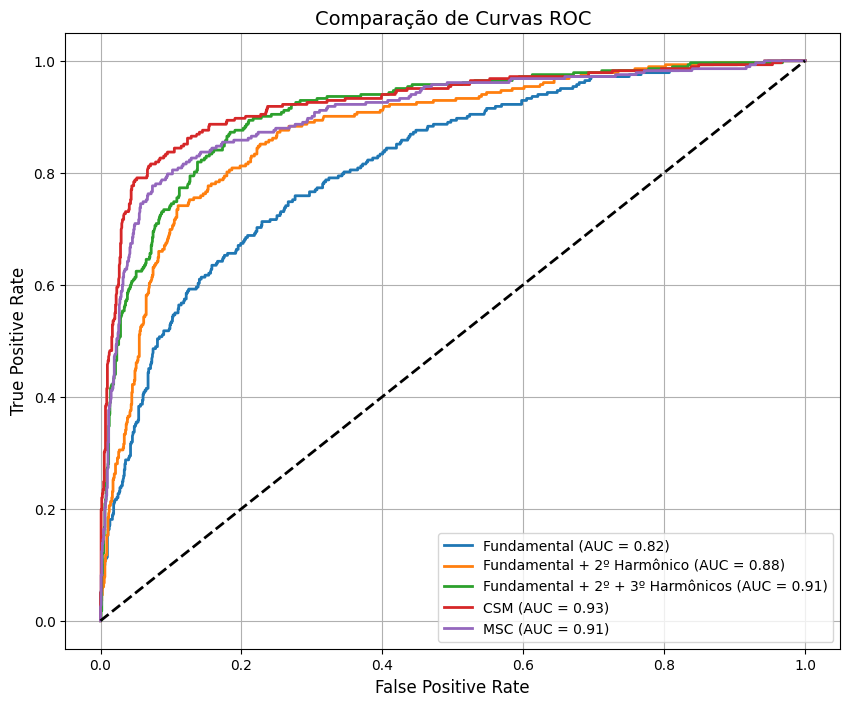

In [28]:
# Após o loop de avaliação dos datasets, adicione:
plot_all_roc_curves(results)